RETIREI OS EFETIVOS E APOSENTADOS E ELETIVOS



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import networkx as nx

import re

In [ ]:
def cria_gf(top10, df):
  # Create a directed graph
  G = nx.DiGraph()

  # Add nodes for each surname in the top 10
  for surname in top10:
    G.add_node(surname)

  # Add edges between each pair of surnames in the top 1
  for sobrenome in top10:
    for _, row in df.iterrows():
      if sobrenome in row['Servidor']:
        G.add_node(row['Servidor'])
        G.add_edge(sobrenome, row['Servidor'])

  return G

In [ ]:
nomes_femininos = pd.read_csv('/content/drive/MyDrive/grafos/ultimos/ibge-fem-10000.csv') # Update with your file path
nomes_masculinos = pd.read_csv('/content/drive/MyDrive/grafos/ultimos/ibge-mas-10000.csv') # Update with your file path

In [ ]:
nomes_femininos

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
9995,LUINE,0,337,10013,F
9996,SILBENE,0,337,10001,F
9997,GERSIANE,0,337,10003,F
9998,DALVANEIDE,0,337,9995,F


In [ ]:
nomes_masculinos

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
9995,RUBIAN,0,265,9993,M
9996,LIZEU,0,265,9984,M
9997,CARKOS,0,265,10001,M
9998,CARLAN,0,265,9977,M


In [ ]:
sttp_all = pd.read_excel('/content/drive/MyDrive/grafos/ultimos/sttp.xlsx') # Update with your file path

In [ ]:
sttp_all

,Unidade Gestora,Município,CPF,Servidor,Tipo de Cargo,Cargo,Vantagens (Bruto),Data de admissão,Matrícula
0,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.418.774-**,Vitor Matheus Ribeiro Felix,Comissionado,Superintendente,97313.46,2023-10-01 00:00:00.000,111450
1,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.491.934-**,Carlos Artur Sousa,Comissionado,Ger. Adm. e Financeiro,64468.29,2023-10-01 00:00:00.000,111451
2,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.008.514-**,Rodolfo Cavalcante Diniz,Comissionado,Chef.div. Apoio ao Transito,59756.66,2013-02-01 00:00:00.000,19738
3,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.199.684-**,Vinicius Jose Carneiro Barreto,Comissionado,Chef. Div. Apoio Tecnico,49641.66,2021-01-01 00:00:00.000,19803
4,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.532.054-**,Jose Avelino Freire Filho,Comissionado,Chef.div.de Sinalizacao,43233.16,2021-01-01 00:00:00.000,19733
...,...,...,...,...,...,...,...,...,...
203,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.750.454-**,Marileide Maciel Nobrega,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais,1410.00,2022-10-01 00:00:00.000,111386
204,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.383.474-**,Paulo Wilames Santos Matoso,Contratação por excepcional interesse público,Vigia,1410.00,2023-12-01 00:00:00.000,111523
205,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.662.604-**,Renato Brito Gomes,Contratação por excepcional interesse público,Vigia,1410.00,2023-12-01 00:00:00.000,111524
206,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.876.384-**,Sandro Helmito Brasileiro de Oliveira,Contratação por excepcional interesse público,Vigia,1410.00,2023-12-01 00:00:00.000,111525


In [ ]:
def sobrenomes_diferentes(df):
  # Extract names from the 'Servidor' column
  nomes = df['Servidor'].tolist()

  # prompt: da lista acima retire o primeiro nome de cada linha, mantendo o resto
  nomes_tratados = []
  for nome in nomes:
    nome_dividido = nome.split()
    nome_tratado = ' '.join(nome_dividido[1:])
    nomes_tratados.append(nome_tratado)


  nomes_nao_encontrados = []

  for nome in nomes_tratados:
    nome_dividido = nome.split()  # Split the name into individual words
    nome_filtrado = []  # Initialize a list to store words not found in the DataFrames
    for n in nome_dividido:
      if n.upper() not in nomes_femininos['nome'].values and n not in nomes_masculinos['nome'].values:
        nome_filtrado.append(n)  # Keep words not found in the DataFrames
    nome_inside = ' '.join(nome_filtrado)  # Join the remaining words back into a string
    nomes_nao_encontrados.append(nome_inside)

  nomes_procurar = []
  for nome in nomes_nao_encontrados:
    nome_dividido = nome.split()
    for i in range(len(nome_dividido)):
      nomes_procurar.append(nome_dividido[i])

  retorno = set(nomes_procurar)

  return retorno

In [ ]:
sobrenomes_diferentes(sttp_all)

{'Aguiar',
 'Albuquerque',
 'Alcantara',
 'Almeida',
 'Alves',
 'Amaral',
 'Andrade',
 'Antunes',
 'Aquino',
 'Araujo',
 'Arcoverde',
 'Arimateia',
 'Arruda',
 'Asfora',
 'Aureliano',
 'Avelino',
 'Azevedo',
 'Balbino',
 'Barbosa',
 'Barreto',
 'Barros',
 'Basilio',
 'Batista',
 'Beck',
 'Bento',
 'Bezerra',
 'Braga',
 'Brasil',
 'Brasileiro',
 'Brito',
 'Bronson',
 'Caitano',
 'Camara',
 'Camelo',
 'Camilo',
 'Campos',
 'Candido',
 'Carneiro',
 'Carvalho',
 'Cassiano',
 'Castro',
 'Cavalcante',
 'Cavalcanti',
 'Celino',
 'Cezar',
 'Chaves',
 'Correia',
 'Costa',
 'Cuellar',
 'Cunha',
 'Dias',
 'Diniz',
 'Donato',
 'Duarte',
 'Dumont',
 'Farias',
 'Feitosa',
 'Felix',
 'Fernandes',
 'Ferreira',
 'Fialho',
 'Figueiredo',
 'Filho',
 'Firmino',
 'Freire',
 'Furtado',
 'Galdino',
 'Gomes',
 'Goncalves',
 'Helmito',
 'Henriques',
 'Inocencio',
 'Isthewany',
 'Jefeter',
 'Ketlley',
 'Leite',
 'Lima',
 'Lino',
 'Lopes',
 'Loureiro',
 'Machado',
 'Maciel',
 'Magalhaes',
 'Marcelino',
 'Marconi

In [ ]:
# prompt: conte quantas vezes cada um dos sobrenomes acima aparece no dataframe, e ordene a lista final do maior para o menor

from collections import Counter

def count_sobrenomes(df):
  # Extract names from the 'Servidor' column
  nomes = df['Servidor'].tolist()

  # prompt: da lista acima retire o primeiro nome de cada linha, mantendo o resto
  nomes_tratados = []
  for nome in nomes:
    nome_dividido = nome.split()
    nome_tratado = ' '.join(nome_dividido[1:])
    nomes_tratados.append(nome_tratado)


  nomes_nao_encontrados = []

  for nome in nomes_tratados:
    nome_dividido = nome.split()  # Split the name into individual words
    nome_filtrado = []  # Initialize a list to store words not found in the DataFrames
    for n in nome_dividido:
      if n.upper() not in nomes_femininos['nome'].values and n not in nomes_masculinos['nome'].values:
        nome_filtrado.append(n)  # Keep words not found in the DataFrames
    nome_inside = ' '.join(nome_filtrado)  # Join the remaining words back into a string
    nomes_nao_encontrados.append(nome_inside)

  nomes_procurar = []
  for nome in nomes_nao_encontrados:
    nome_dividido = nome.split()
    for i in range(len(nome_dividido)):
      nomes_procurar.append(nome_dividido[i])

  # Count the occurrences of each surname
  sobrenome_counts = Counter(nomes_procurar)

  # Sort the surnames by count in descending order
  sorted_sobrenomes = sorted(sobrenome_counts.items(), key=lambda x: x[1], reverse=True)

  print(sorted_sobrenomes[:10])

  top10_sobrenomes = [item[0] for item in sorted_sobrenomes[:10]]

  return top10_sobrenomes


[('Araujo', 19), ('Pereira', 17), ('Lima', 15), ('Gomes', 14), ('Farias', 9), ('Alves', 9), ('Costa', 8), ('Sousa', 7), ('Leite', 7), ('Albuquerque', 6)]


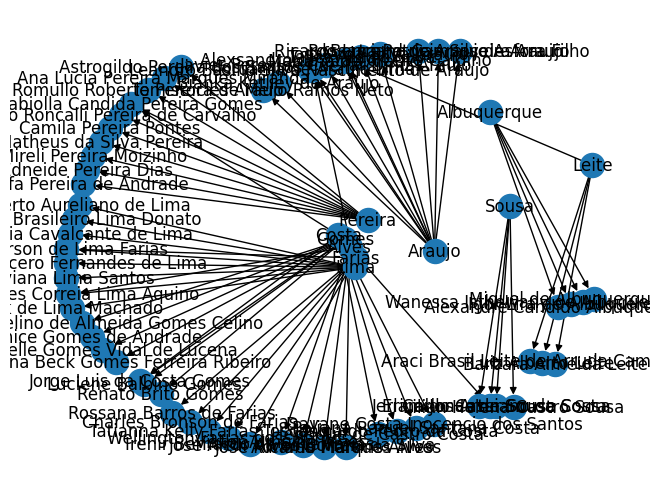

In [ ]:
grafo_sttp = cria_gf(count_sobrenomes(sttp_all), sttp_all)
pos = nx.kamada_kawai_layout(grafo_sttp)
nx.draw(grafo_sttp, pos, with_labels=True)
plt.show()

In [ ]:
nx.write_graphml(grafo_sttp, "grafo_sttp.graphml")
from google.colab import files
# files.download('grafo_sttp.graphml')

In [ ]:
prefmun = pd.read_excel('/content/drive/MyDrive/grafos/ultimos/prefmun.xlsx') # Update with your file path

In [ ]:
prefmun

,Unidade Gestora,Município,CPF,Servidor,Tipo de Cargo,Cargo,Vantagens (Bruto),Data de admissão,Matrícula
0,Prefeitura Municipal de Campina Grande,Campina Grande,***.652.014-**,Helio Pinheiro Mota Filho,Contratação por excepcional interesse público,Medico Anestesiologista,300100.00,2021-10-25 00:00:00.000,900000600004910
1,Prefeitura Municipal de Campina Grande,Campina Grande,***.177.334-**,Adolfo Igor Rodrigues,Contratação por excepcional interesse público,Medico Anestesiologista,233200.00,2021-10-28 00:00:00.000,900000600004909
2,Prefeitura Municipal de Campina Grande,Campina Grande,***.873.454-**,Pablo Emmanuel Magalhaes Nunes,Comissionado,Coordenador Municipal - Gs1,215724.66,2021-04-09 00:00:00.000,28028
3,Prefeitura Municipal de Campina Grande,Campina Grande,***.450.684-**,Delano de Figueiredo Nobrega,À Disposição,Medico - Ced,168220.24,2021-10-22 00:00:00.000,28638
4,Prefeitura Municipal de Campina Grande,Campina Grande,***.852.434-**,Silvya Maria Goncalves Monteiro Silva,Contratação por excepcional interesse público,Medico Pss - Hca,158646.74,2023-07-02 00:00:00.000,900000600006070
...,...,...,...,...,...,...,...,...,...
17886,Prefeitura Municipal de Campina Grande,Campina Grande,***.880.654-**,Raniele Barbosa Silva,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais,141.20,2021-01-10 00:00:00.000,900000500058632
17887,Prefeitura Municipal de Campina Grande,Campina Grande,***.808.204-**,Roberta Sabino Gadelha Fontes,Comissionado,Assessor Tecnico - Cat1,96.94,2021-01-01 00:00:00.000,27674
17888,Prefeitura Municipal de Campina Grande,Campina Grande,***.379.874-**,Rennan da Silva Lima,Contratação por excepcional interesse público,Secretaria,94.13,2024-06-01 00:00:00.000,300107790
17889,Prefeitura Municipal de Campina Grande,Campina Grande,***.408.054-**,Maria da Conceicao Dantas de Almeida,Contratação por excepcional interesse público,Psicologo,91.09,2024-01-02 00:00:00.000,100000000243276


[('Araujo', 1069), ('Lima', 1052), ('Pereira', 1030), ('Sousa', 846), ('Alves', 835), ('Costa', 759), ('Barbosa', 741), ('Nascimento', 723), ('Gomes', 705), ('Ferreira', 644)]


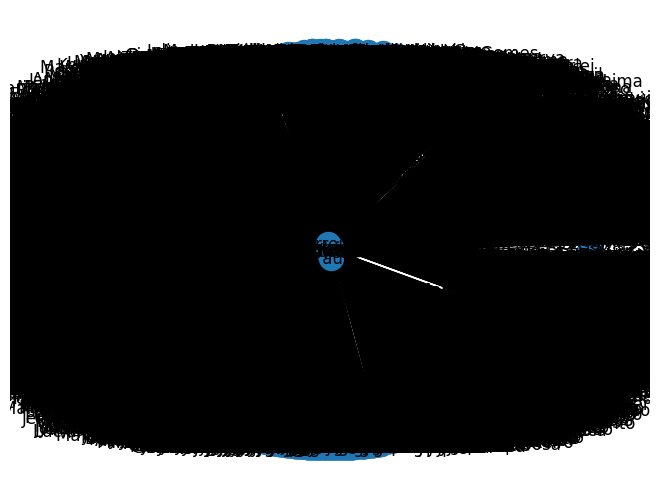

In [ ]:
grafo_prefmun = cria_gf(count_sobrenomes(prefmun), prefmun)
pos = nx.kamada_kawai_layout(grafo_prefmun)
nx.draw(grafo_prefmun, pos, with_labels=True)
plt.show()

In [ ]:
nx.write_graphml(grafo_prefmun, "grafo_prefmun.graphml")
from google.colab import files
# files.download('grafo_prefmun.graphml')

[('Araujo', 4), ('Diniz', 2), ('Braga', 2), ('Farias', 2), ('Nascimento', 2), ('Barros', 2), ('Hermano', 1), ('Pacheco', 1), ('M.b.', 1), ('Gomes', 1)]


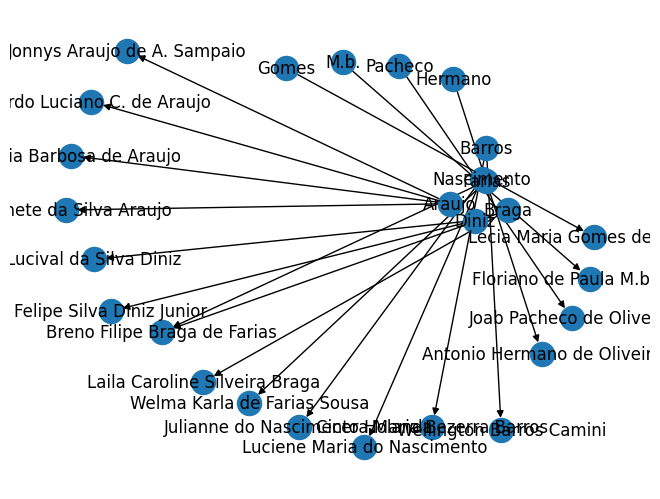

In [ ]:
instprev = pd.read_excel('/content/drive/MyDrive/grafos/ultimos/instprev.xlsx') # Update with your file path
grafo_instprev = cria_gf(count_sobrenomes(instprev), instprev)
pos = nx.kamada_kawai_layout(grafo_instprev)
nx.draw(grafo_instprev, pos, with_labels=True)
plt.show()

nx.write_graphml(grafo_instprev, "grafo_instprev.graphml")
from google.colab import files
# files.download('grafo_instprev.graphml')

In [ ]:
instprev

,Unidade Gestora,Município,CPF,Servidor,Tipo de Cargo,Cargo,Vantagens (Bruto),Data de admissão,Matrícula
0,Instituto de Prev. dos Serv. Mun. de Campina G...,Campina Grande,***.745.694-**,Antonio Hermano de Oliveira,Comissionado,Presidente,118610.79,2019-01-01 00:00:00.000,400939
1,Instituto de Prev. dos Serv. Mun. de Campina G...,Campina Grande,***.439.624-**,Joab Pacheco de Oliveira,Comissionado,Diretor Economico Financeiro,85903.54,2021-01-01 00:00:00.000,401307
2,Instituto de Prev. dos Serv. Mun. de Campina G...,Campina Grande,***.612.074-**,Floriano de Paula M.b. Junior,Comissionado,Procurador,78478.79,2019-01-01 00:00:00.000,401269
3,Instituto de Prev. dos Serv. Mun. de Campina G...,Campina Grande,***.109.664-**,Lecia Maria Gomes de Oliveira,À Disposição,Servidor Cedido,71080.73,2019-01-01 00:00:00.000,401218
4,Instituto de Prev. dos Serv. Mun. de Campina G...,Campina Grande,***.211.494-**,Lucival da Silva Diniz,Comissionado,Coordenador,55370.24,2019-01-01 00:00:00.000,400041
5,Instituto de Prev. dos Serv. Mun. de Campina G...,Campina Grande,***.833.084-**,Jonnys Araujo de A. Sampaio,Comissionado,Coordenador,51703.58,2019-01-01 00:00:00.000,401196
6,Instituto de Prev. dos Serv. Mun. de Campina G...,Campina Grande,***.502.384-**,Mario Sergio Lima de Oliveira,Comissionado,Coordenador,50936.91,2019-01-01 00:00:00.000,400980
7,Instituto de Prev. dos Serv. Mun. de Campina G...,Campina Grande,***.553.954-**,Albanete Bento Tomaz,Comissionado,Coordenador,48197.31,2019-01-01 00:00:00.000,401005
8,Instituto de Prev. dos Serv. Mun. de Campina G...,Campina Grande,***.661.484-**,Felipe Silva Diniz Junior,À Disposição,Servidor Cedido,48056.80,2019-01-01 00:00:00.000,401277
9,Instituto de Prev. dos Serv. Mun. de Campina G...,Campina Grande,***.076.084-**,Breno Filipe Braga de Farias,Comissionado,Coordenador,45859.81,2023-07-01 00:00:00.000,401323


[('Rodrigues', 2), ('Santiago', 2), ('Nobrega', 1), ('Avelino', 1), ('Farias', 1), ('Batista', 1), ('Pereira', 1), ('Freire', 1), ('Filho', 1), ('Marques', 1)]


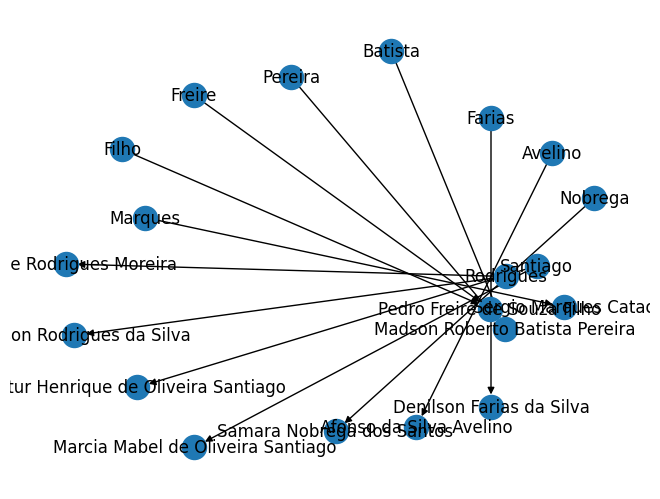

In [ ]:
empurb = pd.read_excel('/content/drive/MyDrive/grafos/ultimos/empurb.xlsx') # Update with your file path
grafo_empurb = cria_gf(count_sobrenomes(empurb), empurb)
pos = nx.kamada_kawai_layout(grafo_empurb)
nx.draw(grafo_empurb, pos, with_labels=True)
plt.show()

nx.write_graphml(grafo_empurb, "grafo_empurb.graphml")
from google.colab import files
# files.download('grafo_empurb.graphml')

In [ ]:
empurb

,Unidade Gestora,Município,CPF,Servidor,Tipo de Cargo,Cargo,Vantagens (Bruto),Data de admissão,Matrícula
0,Empresa Municipal de Urbanização da Borborema,Campina Grande,***.204.044-**,Samara Nobrega dos Santos,Comissionado,Diretora Administrativo e Financeira,91578.11,2005-03-01 00:00:00.000,14
1,Empresa Municipal de Urbanização da Borborema,Campina Grande,***.984.774-**,Afonso da Silva Avelino,Comissionado,Diretor Presidente da Urbema,47918.82,2023-12-15 00:00:00.000,93
2,Empresa Municipal de Urbanização da Borborema,Campina Grande,***.877.024-**,Denilson Farias da Silva,Comissionado,Diretor Presidente da Urbema,44724.23,2024-04-17 00:00:00.000,96
3,Empresa Municipal de Urbanização da Borborema,Campina Grande,***.087.504-**,Madson Roberto Batista Pereira,Comissionado,Assessor Planejamento,44135.15,2020-08-03 00:00:00.000,77
4,Empresa Municipal de Urbanização da Borborema,Campina Grande,***.208.214-**,Pedro Freire de Souza Filho,Comissionado,Auditor,21695.58,2020-05-01 00:00:00.000,75
5,Empresa Municipal de Urbanização da Borborema,Campina Grande,***.031.554-**,Sergio Marques Catao,Comissionado,Assessor Juridico,21695.58,2013-07-01 00:00:00.000,33
6,Empresa Municipal de Urbanização da Borborema,Campina Grande,***.000.754-**,Solange Rodrigues Moreira,Comissionado,Gerente Operacional,20883.55,2012-03-26 00:00:00.000,24
7,Empresa Municipal de Urbanização da Borborema,Campina Grande,***.892.404-**,Maria Gabriela Loureiro Calvarro Martin,Comissionado,Gerente de Projetos e Obras,16156.79,2023-04-03 00:00:00.000,91
8,Empresa Municipal de Urbanização da Borborema,Campina Grande,***.634.124-**,Paulo Sergio Gayoso Meira,Comissionado,Gerente Financeiro,16156.79,2020-05-01 00:00:00.000,45
9,Empresa Municipal de Urbanização da Borborema,Campina Grande,***.361.314-**,Artur Henrique de Oliveira Santiago,Comissionado,Chefe da Divisao de Equipamentos Especiais,11535.28,2022-04-13 00:00:00.000,85


[('Araujo', 31), ('Lima', 26), ('Gomes', 19), ('Pereira', 19), ('Sousa', 19), ('Ferreira', 16), ('Rodrigues', 15), ('Costa', 15), ('Alves', 15), ('Barbosa', 14)]


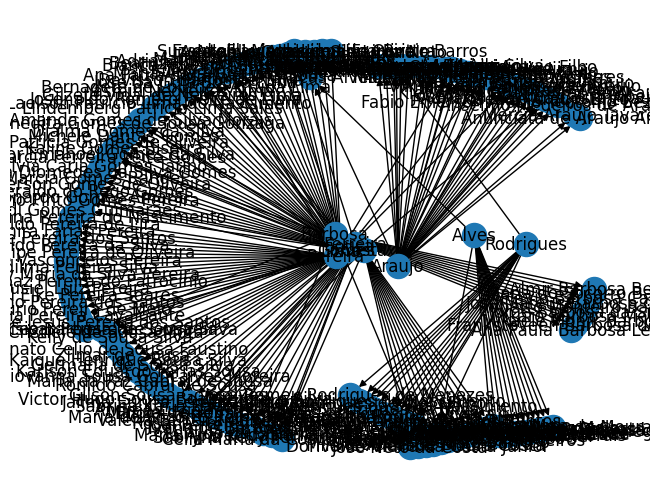

In [ ]:
camara_mun = pd.read_excel('/content/drive/MyDrive/grafos/ultimos/camara_mun.xlsx') # Update with your file path
grafo_camaramun = cria_gf(count_sobrenomes(camara_mun), camara_mun)
pos = nx.kamada_kawai_layout(grafo_camaramun)
nx.draw(grafo_camaramun, pos, with_labels=True)
plt.show()

nx.write_graphml(grafo_camaramun, "grafo_camaramun.graphml")
from google.colab import files
# files.download('grafo_camaramun.graphml')

In [ ]:
camara_mun

,Unidade Gestora,Município,CPF,Servidor,Tipo de Cargo,Cargo,Vantagens (Bruto),Data de admissão,Matrícula
0,Câmara Municipal de Campina Grande,Campina Grande,***.203.904-**,Jailma Eunira Ferreira Ordonho,Comissionado,Secretario de Apoio Parlamentar,76782.16,2021-08-02 00:00:00.000,152113
1,Câmara Municipal de Campina Grande,Campina Grande,***.819.154-**,Luiz Phillipe Pinto de Souza,Comissionado,Procurador Juridico,76782.16,2021-01-04 00:00:00.000,18791
2,Câmara Municipal de Campina Grande,Campina Grande,***.035.094-**,Jose Romeu Rodrigues de Menezes,Comissionado,Secretaria de Administracao,72800.00,2015-01-01 00:00:00.000,9733
3,Câmara Municipal de Campina Grande,Campina Grande,***.108.494-**,Sabrina Karla Ferreira Borges,Comissionado,Cc - Chefe de Gabinete,72800.00,2023-02-01 00:00:00.000,140197
4,Câmara Municipal de Campina Grande,Campina Grande,***.738.324-**,Maesio Tavares de Melo,Comissionado,Diretor Contabilidade,54844.40,2021-01-01 00:00:00.000,140164
...,...,...,...,...,...,...,...,...,...
379,Câmara Municipal de Campina Grande,Campina Grande,***.454.914-**,Ronildo Cabral de Sousa,Comissionado,Oficial de Gabinete de Vereador Ogv,2500.00,2024-04-01 00:00:00.000,152540
380,Câmara Municipal de Campina Grande,Campina Grande,***.149.444-**,Adriana Alves de Moura,À Disposição,A Disposicao,2000.00,2024-06-03 00:00:00.000,152549
381,Câmara Municipal de Campina Grande,Campina Grande,***.285.614-**,Jose Filipe Alves Freire,Comissionado,Oficial de Gabinete de Vereador Ogv,1440.00,2023-08-01 00:00:00.000,152421
382,Câmara Municipal de Campina Grande,Campina Grande,***.223.204-**,Luis Felipe Marques,Comissionado,Oficial de Gabinete de Vereador Ogv,1440.00,2022-01-03 00:00:00.000,152285


[('Araujo', 8), ('Lima', 7), ('Alves', 6), ('Nascimento', 6), ('Pereira', 6), ('Almeida', 5), ('Barbosa', 5), ('Sousa', 5), ('Brito', 5), ('Costa', 5)]


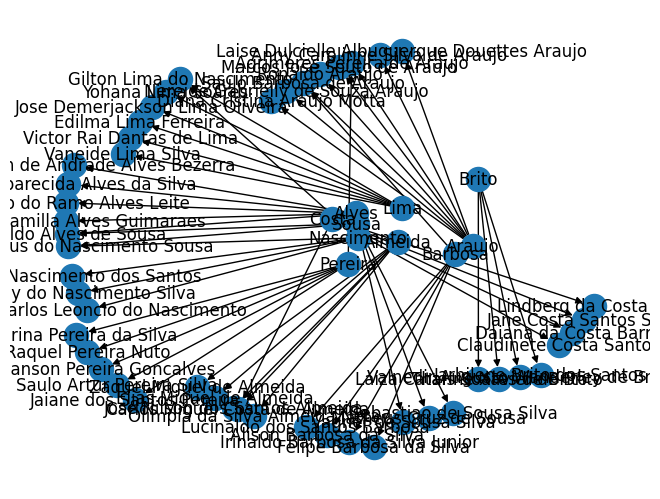

In [ ]:
agmundes = pd.read_excel('/content/drive/MyDrive/grafos/ultimos/agmundes.xlsx') # Update with your file path
grafo_agmundes = cria_gf(count_sobrenomes(agmundes), agmundes)
pos = nx.kamada_kawai_layout(grafo_agmundes)
nx.draw(grafo_agmundes, pos, with_labels=True)
plt.show()

nx.write_graphml(grafo_agmundes, "grafo_agmundes.graphml")
from google.colab import files
# files.download('grafo_agmundes.graphml')

In [ ]:
agmundes

,Unidade Gestora,Município,CPF,Servidor,Tipo de Cargo,Cargo,Vantagens (Bruto),Data de admissão,Matrícula
0,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.752.774-**,Emerson Cabral Nobrega,Comissionado,Diretor Presidente,85814.73,2024-01-24 00:00:00.000,1473
1,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.101.944-**,Luis Artur Sabino de Oliveira,Comissionado,Diretor de Incentivos,64903.07,2023-10-01 00:00:00.000,1359
2,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.080.114-**,Bruce Snider Cicero Montenegro Cordeiro,Comissionado,Assessor Juridico,30875.70,2024-02-01 00:00:00.000,1474
3,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.077.044-**,Joao Cordeiro Guedes,Comissionado,Assessor Tecnico,26395.00,2024-02-01 00:00:00.000,1475
4,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.189.474-**,Mariana Mangueira Vaz,Contratação por excepcional interesse público,Supervisor Administrativo,19170.45,2023-11-01 00:00:00.000,1455
...,...,...,...,...,...,...,...,...,...
97,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.790.004-**,Janaina da Silva,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais,1412.00,2024-06-01 00:00:00.000,1550
98,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.003.624-**,Vaneide Lima Silva,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais,1412.00,2024-06-01 00:00:00.000,1549
99,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.138.254-**,Yasmim Santos,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais,1412.00,2024-06-01 00:00:00.000,1551
100,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.447.464-**,Felipe Barbosa da Silva,Contratação por excepcional interesse público,Assistente Administrativo,1400.00,2023-11-01 00:00:00.000,1430
